In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
dataset_boston = load_boston()

In [3]:
dataset_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
x = dataset_boston.data
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
y = dataset_boston.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=1)

In [7]:
#from sklearn.preprocessing import StandardScaler
#scaled = StandardScaler()
#scaled.fit(x_train,x_test)
#scaled_data = scaled.transform(x_train,x_test)

In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
kernel_name = ['linear', 'poly', 'rbf']
Min_mean_squared_error = []
for i in kernel_name:
    cv_reg = SVR(kernel=i)#SVC = support vector classifier
    cv_reg.fit(x_train,y_train)
    y_pred = cv_reg.predict(x_test)
    score = mean_squared_error(y_test,y_pred)
    Min_mean_squared_error.append(score)
Min_mean_squared_error

[23.845944148433478, 81.4988939941215, 80.88313574924172]

In [22]:
df = pd.DataFrame({'kernal':kernel_name,'Min_mean_squared_error':Min_mean_squared_error})
df

,kernal,Min_mean_squared_error
0,linear,23.845944
1,poly,81.498894
2,rbf,80.883136


Text(0, 0.5, 'Accuracy')

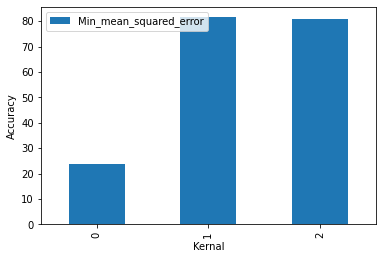

In [23]:
df.plot(kind='bar')
plt.xlabel('Kernal')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

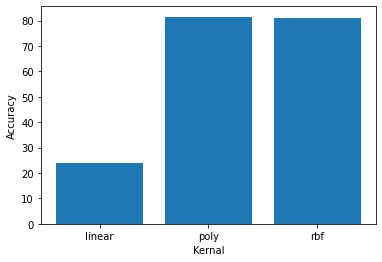

In [37]:
plt.bar(kernel_name,Min_mean_squared_error)
plt.xlabel('Kernal')
plt.ylabel('Accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

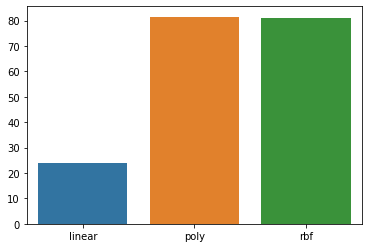

In [41]:
sns.barplot(kernel_name,Min_mean_squared_error)

In [24]:
cv_reg = SVR(kernel='linear')
cv_reg.fit(x_train,y_train)

SVR(kernel='linear')

In [25]:
y_pred = cv_reg.predict(x_test)
print(y_pred.shape)
y_pred

(102,)


array([30.84301777, 27.21122035, 18.00277066, 20.7978153 , 16.64796722,
       19.38785562, 31.04694785, 17.8063735 , 22.04151253, 25.50293616,
       23.81865229, 28.92614024, 19.40799998, 24.40739934, 21.56947204,
       16.35853739, 17.41270874, 38.20850441, 27.56083181, 11.41527954,
       19.483256  , 16.45937934, 24.26518899, 24.83013036, 29.00767836,
        8.95837207, 14.49857265, 17.40735668, 35.63421101, 13.16507014,
       22.06483417, 14.33845407, 41.77393088, 17.83411944, 21.14680836,
       20.94810792, 17.67623325, 28.0896765 ,  4.99576988, 17.946098  ,
       23.73537393, 22.98287114, 27.25672598, 14.76861837, 17.18864256,
       15.40814383, 35.45371001, 16.33329149, 21.7720951 , 18.0652265 ,
       24.27383227, 23.65222834, 24.64253442, 23.1444044 ,  3.79755694,
       23.69326109, 12.17758891, 25.15488563, 17.51098422, 35.84865906,
       18.40798382, 26.45750877, 15.27346886, 15.59115073, 14.14860087,
       31.22893781, 36.54877771, 22.15138393, 22.74301134, 21.69

In [32]:
print(y_test.shape)
y_test

(102,)


array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4])

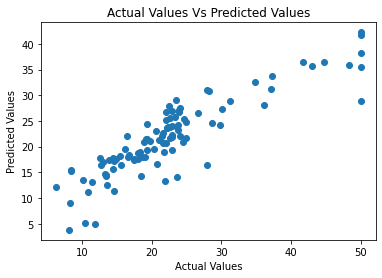

In [42]:
# Visualizing the differences between actual Values and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values Vs Predicted Values")
plt.show()

In [33]:
min_error = mean_squared_error(y_test,y_pred)
min_error

23.845944148433478

In [34]:
score = r2_score(y_test,y_pred)
score

0.7587111803986668